# Data Reasoning
## Reasons for Choosing this Specific 'Stock' Data
### Relevance
- The data should be relevant to the objectives of the analysis. For a stock market dashboard, relevant data might include stock prices, volumes, market capitalization, and other financial metrics that help in making informed investment decisions.

### Completeness
- A good dataset will have comprehensive coverage of the stocks or market segments of interest, including historical data which can be important for trend analysis.

### Accuracy
- The data should be from a reliable source to ensure accuracy. Inaccurate data can lead to incorrect conclusions and potentially costly investment decisions.

## Data Provenance
- My data comes from the data scrapping towards the official listed exchange egancies.
- Understanding where the data comes from helps establish its trustworthiness. Data from reputable financial institutions or stock exchanges, for my data, it comes from NASDAQ or NYSE, is generally considered reliable.
- The transparency into my data collection and processing methods is important for reproducibility and for understanding any potential biases or errors in the data.

# Setup and data cleaning

In [5]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.graph_objs as go
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt #for plotting
stock = pd.read_csv('data.csv')
df = pd.DataFrame(stock)
# Remove dollar signs and convert to float
df['Price'] = df['Price'].replace('[\$,]', '', regex=True).astype(float)


# Exploratory data analysis
## Data Preview

In [6]:
stock.head()

,Symbol,Company name,Market cap,Beta,Price,Last annual dividend,Volume,Exchange short name
0,MSFT,Microsoft Corporation,3.018393e+12,0.89,$406.22,3.00,17224588.0,NASDAQ
1,AAPL,Apple Inc.,2.636396e+12,1.29,$170.73,0.96,75752033.0,NASDAQ
2,NVDA,NVIDIA Corporation,2.188200e+12,1.73,$875.28,0.16,111670623.0,NASDAQ
3,VSMPX,Vanguard Total Stock Mkt Idx Instl Pls,1.967259e+12,1.01,$232.31,2.36,0.0,NASDAQ
4,AMZN,"Amazon.com, Inc.",1.821431e+12,1.17,$175.35,0.00,36818049.0,NASDAQ


## Number of rows

In [7]:
len(stock)

50

## Number of unique catagoris for each categorical variable

In [8]:
symbol_count = df['Symbol'].nunique()
print("Number of Symbols:", symbol_count)
comp_count = df['Company name'].nunique()
print("Number of Company Name:", comp_count)
xchange_count = df['Exchange short name'].nunique()
print("Number of Exchange short name:", xchange_count)

Number of Symbols: 50
Number of Company Name: 45
Number of Exchange short name: 4


## Missing data

In [9]:
missing_per_row = df.isna().sum(axis=1)
print("Number of missing values per row: ", missing_per_row)

Number of missing values per row:  0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
42    0
43    0
44    0
45    0
46    0
47    0
48    0
49    0
dtype: int64


## Distribution Analysis
### Statistical Summary

In [10]:

print(df.describe())

         Market cap       Beta          Price  Last annual dividend  \
count  5.000000e+01  50.000000      50.000000             50.000000   
mean   7.469540e+11   0.987800   12511.876200              3.475400   
std    6.425410e+11   0.362622   86186.203606              3.804582   
min    2.961216e+11   0.180000       9.600000              0.000000   
25%    3.370959e+11   0.905000     133.655000              0.970000   
50%    4.545297e+11   1.000000     197.805000              2.380000   
75%    8.737037e+11   1.117500     473.060000              5.090000   
max    3.018393e+12   2.420000  609748.440000             21.000000   

             Volume  
count  5.000000e+01  
mean   1.585693e+07  
std    2.863976e+07  
min    0.000000e+00  
25%    2.665258e+05  
50%    4.524672e+06  
75%    1.198951e+07  
max    1.197764e+08  


### Histograms and Density Plots
- Market cap: right skewed 
- Beta: normal distribution
- Price: right skewed
- Dividend: right skewed
- Volumn: right skewed

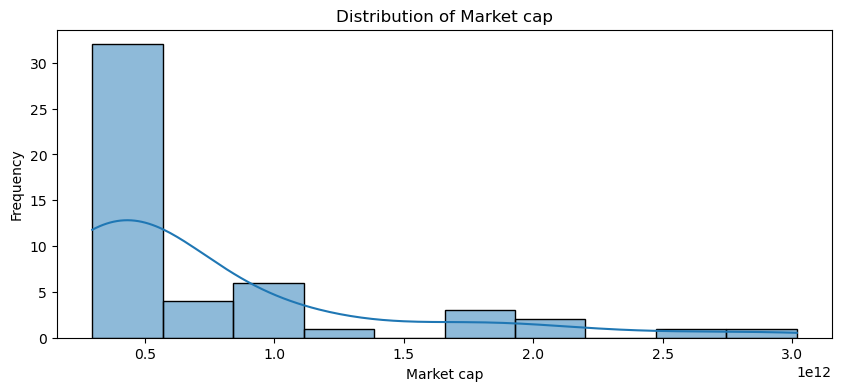

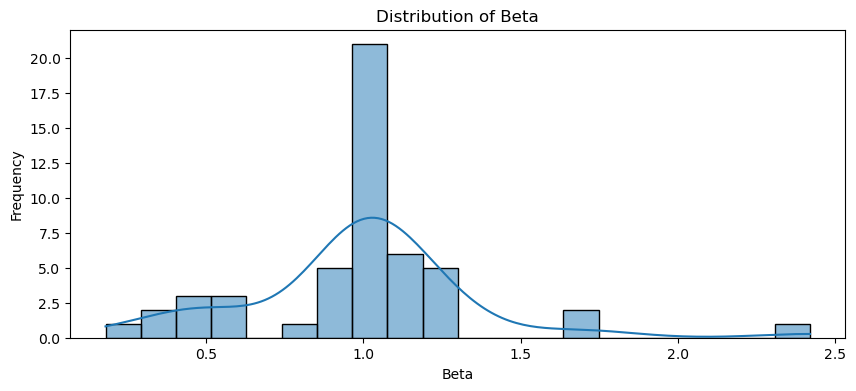

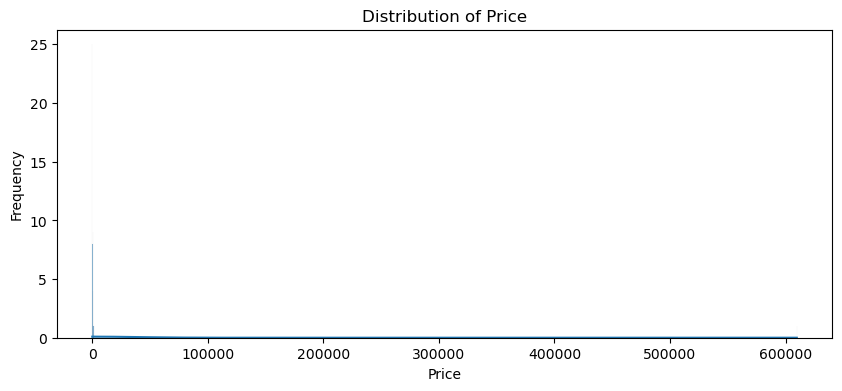

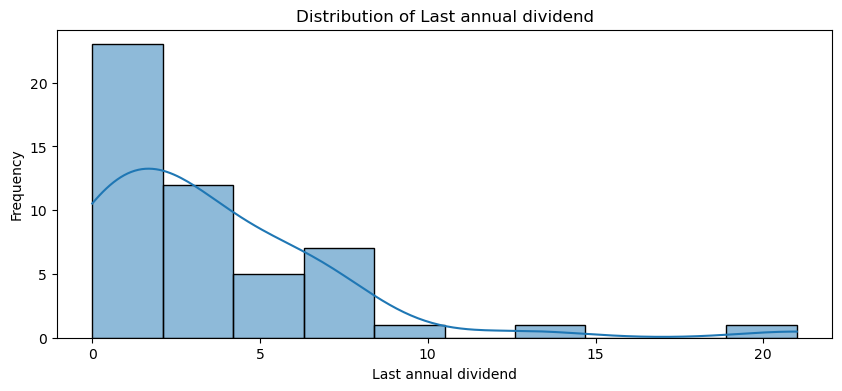

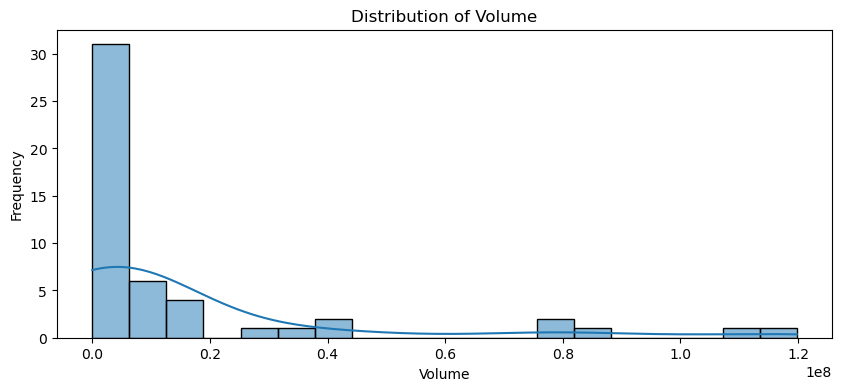

In [11]:
# Plotting histograms and density plots for each continuous variable
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)  # kde for density curve
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Boxplots
- Market Cap: 6 large outliers 
- Beta: both small and large outliers exist
- Price: two very large outliers
- Dividend: two large outliers
- Volumn: muliple large outliers
It makes sense because our histogram analysis shows very right skewed distribution for most graphs (excluding Beta, which explains why it has both large and small outliers)

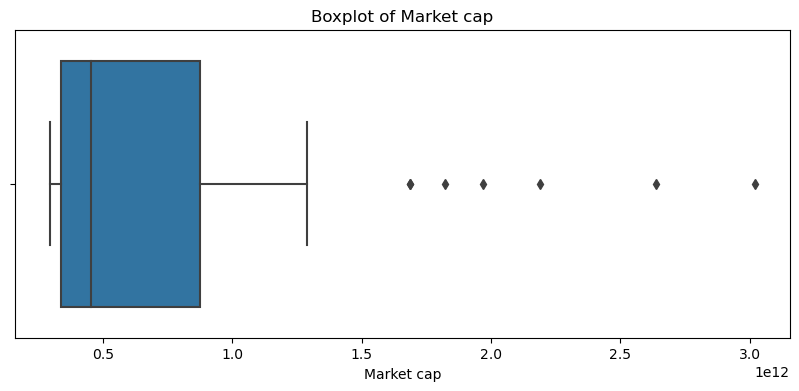

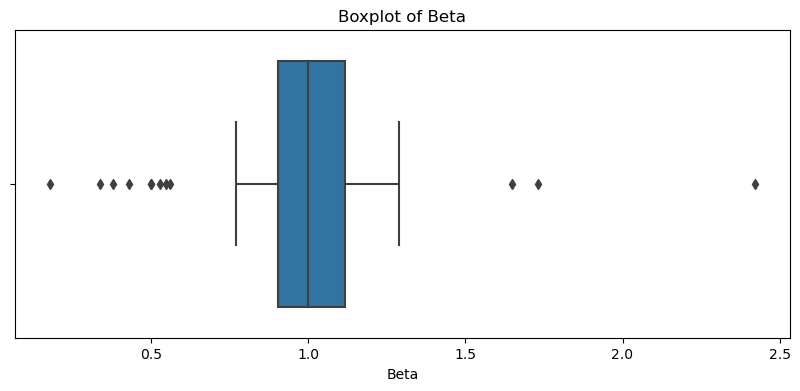

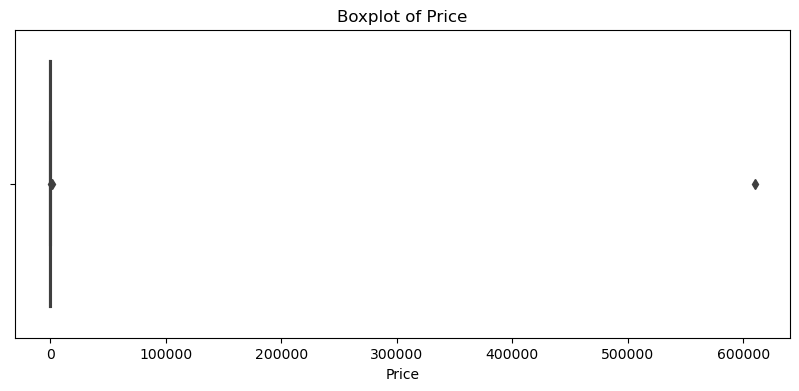

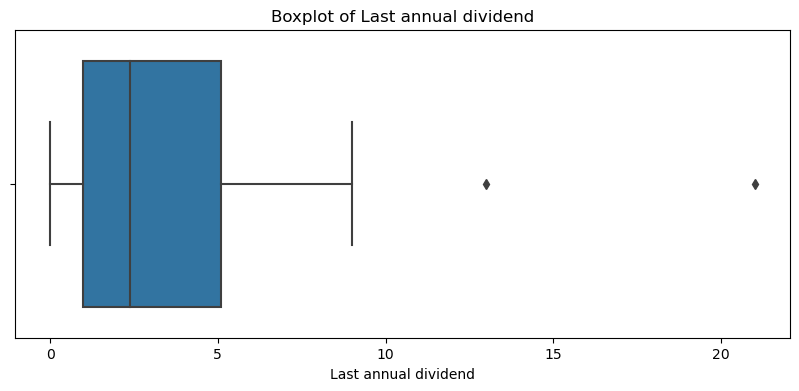

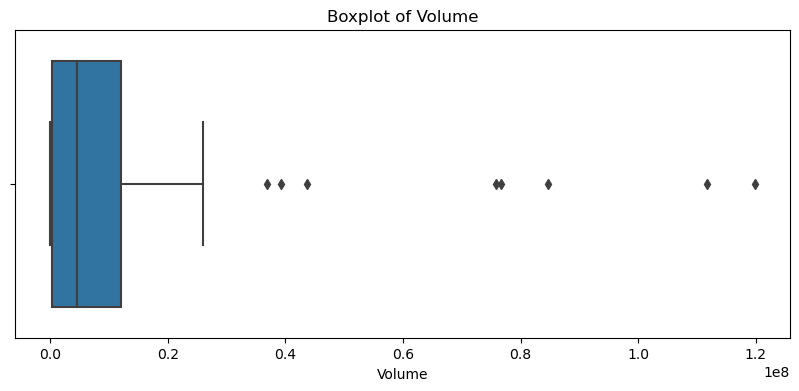

In [12]:
# Plotting boxplots for each continuous variable
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel(column)
    plt.show()

### Scatter Plots
It is barely a linear distribution, verified by the weak (0.36) correlation between Market cap and Volume.

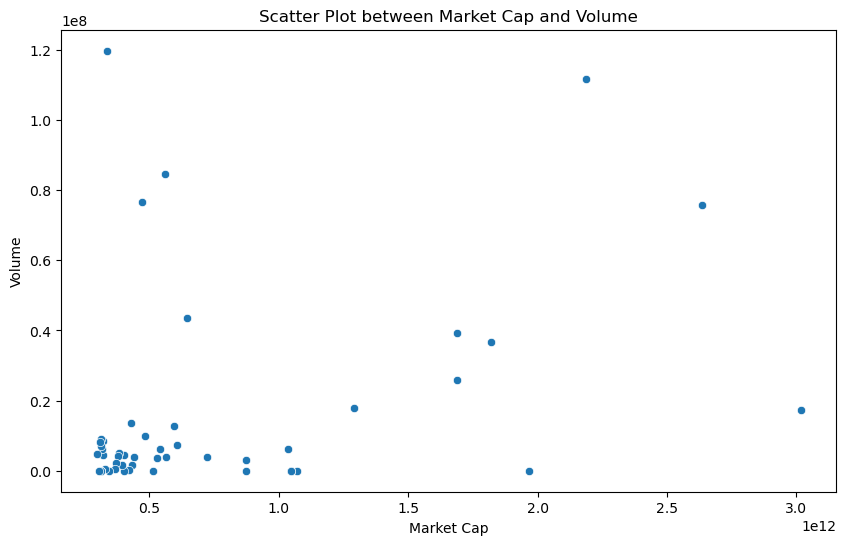

0.3580984324699337

In [13]:
# Scatter plot between 'Market cap' and 'Volume'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Market cap', y='Volume')
plt.title('Scatter Plot between Market Cap and Volume')
plt.xlabel('Market Cap')
plt.ylabel('Volume')
plt.show()
df['Market cap'].corr(df['Volume'])

# Stock Data Dictionary

## Data Dictionary

| Column Name            | Data Type | Description                                                  |
|------------------------|-----------|--------------------------------------------------------------|
| `Symbol`               | string    | The ticker symbol with which the stock is traded on the exchange. |
| `Company name`         | string    | The full name of the company.                                |
| `Market cap`           | float     | The total market value of the company's outstanding shares. Represented in USD. |
| `Beta`                 | float     | The measure of a stock's volatility in relation to the overall market. |
| `Price`                | float     | The current trading price of the stock.                      |
| `Last annual dividend` | float     | The last dividend paid per share on an annual basis.         |
| `Volume`               | float     | The total number of shares traded for the stock in a day.    |
| `Exchange short name`  | string    | The abbreviated name of the exchange where the stock is traded (e.g., NASDAQ). |

## Notes
- All financial figures are in USD.
- Market capitalization is calculated as the share price multiplied by the number of outstanding shares.
- The `Beta` value is relative to the market index which is considered to have a Beta of 1.0.
- `Volume` represents the liquidity of the stock and can be used to assess the stock's stability and risk.
- The data is based on the latest available information and is subject to change with market conditions.

# Dashboard UI Components for Stock Data

## Components List

### 1. Navigation Bar
- **Purpose**: Allows users to navigate different sections of the dashboard easily.
- **Features**: Includes links to various pages such as Home, About, Detailed Analysis, and Contact.

### 2. Search Bar
- **Purpose**: Enables users to search for specific stocks by their symbol or company name.
- **Features**: Autocomplete suggestions, search history, and advanced search filters.

### 3. Real-time Stock Ticker
- **Purpose**: Displays live stock price updates.
- **Features**: Scrolling or fading transition effects for showing stock symbols and their current prices.

### 4. Interactive Stock Charts
- **Purpose**: Visualizes stock price movements over time.
- **Features**: Candlestick charts, line graphs, and bar charts with zoom and pan capabilities.

# UI Components for Stock Market Dashboard

## Components

### Navigation Bar
- **Logo**: A clickable logo that redirects users to the homepage.
- **Menu Items**: Links to different sections of the dashboard like 'Market Overview', 'Portfolio Analysis', etc.
- **Search Bar**: Allows users to search for specific stocks or indexes.

### Data Display Components
- **Data Tables**: To display stock details like current price, daily high and low, etc.
- **Cards**: For quick stats such as market cap, P/E ratio, dividend yield, etc.
- **Ticker**: A live-scrolling ticker showing real-time stock price updates.

### Filters and Selectors
- **Date Range Picker**: To select a date range for historical data analysis.
- **Dropdown Selectors**: To choose specific sectors or industries for focused analysis.
- **Checkbox Filters**: For filtering stocks based on criteria like market cap size, dividend-paying, etc.

### User Input
- **Sliders**: To adjust thresholds for metrics like volume, beta, etc.
- **Form Input**: For adding stocks to a watchlist or portfolio.

### Interactive Components
- **Tab Views**: To switch between different data visualizations and tables.
- **Accordion**: To collapse or expand information sections for a cleaner design.
- **Buttons**: For actions like 'Refresh Data', 'Export Data', etc.
